In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from skimage import io
from skimage import transform
from sklearn.utils import shuffle
from keras.utils import np_utils
import scipy.stats
import copy

ImportError: Traceback (most recent call last):
  File "C:\Users\nikit\anaconda3_64\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\nikit\anaconda3_64\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\nikit\anaconda3_64\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\nikit\anaconda3_64\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\nikit\anaconda3_64\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: Файл подкачки слишком мал для завершения операции.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [ ]:
frame = pd.read_csv('samples_with_marks.csv')

filenames = np.asarray(frame['filename'])
result_ = np.asarray(frame['result'])

Y_ = np.ndarray((filenames.size, 32, 32))
for i in range(filenames.size):
    X = io.imread(filenames[i], as_gray = True) 
    #максимальная длина картинки в наших данных - 31
    X = np.r_[np.c_[X, np.ones((X.size // X[1].size, 32 - X[1].size))], np.ones((32-X.size // X[1].size, 32))] 
    Y_[i] = X
Y_ = 1-Y_
Y_ = Y_.astype('float32')

waste = [i for i in range(result_.shape[0]) if result_[i] == 10]
result_ = np.delete(result_, waste, axis = 0)
Y_ = np.delete(Y_, waste, axis = 0)


Y_test = Y_[::5]
result_test = result_[::5]     
Y = np.delete(Y_, list(range(0, Y_.shape[0], 5)), axis=0)
result = np.delete(result_, list(range(0, result_.shape[0], 5)), axis=0)


num_train = 6000
num_test = 1000
height, width, depth = 32, 32, 1 
num_classes = 10

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype('float32') 
Y_train = np.ndarray((num_train, height, width))
for i in range(num_train):
    Y_train[i] = np.r_[np.c_[X_train[i], np.ones((28, 4))], np.ones((4, 32))]
Y_train /= 255
y_train = y_train[:6000]


X_MNIST = Y_train[:Y_train.shape[0] // 2]
X = Y
X_noised = Y[Y.shape[0] // 2:]
#X_rotate = Y[::2]
#X_MNIST_rotate = Y_train[::2]
#X_inverted = 1 - Y

y_MNIST = y_train[:Y_train.shape[0] // 2]
y = result
y_noised = result[Y.shape[0] // 2:]
#y_rotate = result[::2]
#y_MNIST_rotate = y_train[::2]
#y_inverted = result

for i in range(X_noised.shape[0]):
    X_noised[i] = transform.rotate(transform.rotate(X_noised[i], 60), -60)
#for i in range(X_rotate.shape[0]):
    #X_rotate[i] = transform.rotate(X_rotate[i], 7.31 * i)
#for i in range(X_MNIST_rotate.shape[0]):
    #X_MNIST_rotate[i] = transform.rotate(X_MNIST_rotate[i], 7.31 * i)
    
#X_tr = np.concatenate((X_MNIST, X, X_noised, X_rotate, X_MNIST_rotate, X_inverted))
#y_tr = np.concatenate((y_MNIST, y, y_noised, y_rotate, y_MNIST_rotate, y_inverted))
X_tr = np.concatenate((X_MNIST, X, X_noised))
y_tr = np.concatenate((y_MNIST, y, y_noised))
data, ans = shuffle(X_tr, y_tr)


num_samples = 5000
meta_data, meta_ans = data[:num_samples], ans[:num_samples]
data, ans = data[:num_samples], ans[:num_samples]

In [3]:
model_0 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_10 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_11 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_12 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_13 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_14 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_15 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_16 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_17 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_18 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_19 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_20 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_21 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_22 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_23 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_24 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_25 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_26 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_27 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_28 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_29 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

models = [model_0, model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9, model_10, model_11, model_12, model_13, model_14, model_15, model_16, model_17, model_18, model_19, model_20, model_21, model_22, model_23, model_24, model_25, model_26, model_27, model_28, model_29]
num_mod = 30

In [5]:
answers = np.ndarray((num_mod, ans.shape[0]))

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(input_shape=(num_mod,1), filters=30, kernel_size=10, padding='same', activation='softmax'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_mod*3, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

weights_file = 'weights.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(weights_file, monitor='acc')

for j in range(5):
    for i in range(2*j, num_mod-2*j):
        models[i].compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']) 
    
        models[i].fit(data.reshape(-1, 32, 32, 1), ans, epochs=1, batch_size = 5*(i+1), callbacks=[checkpoint])
        answers[i] = np.argmax(models[i].predict(data.reshape(-1, 32, 32, 1)), axis = 1)
    
    answer = answers.transpose()
    model.fit(answer.reshape(-1, num_mod, 1), ans, epochs=1, batch_size = 10, callbacks=[checkpoint])

d_test = np.ndarray((num_mod, result_test.shape[0]))
for i in range(num_mod):
    d_test[i] = np.argmax(models[i].predict(Y_test.reshape(-1, 32, 32, 1)), axis = 1)
    
d_test = d_test.transpose()
most, mostcc = scipy.stats.mode(d_test, axis=1)

mist = 0
most.reshape(most.shape[0],)
for i in range(most.shape[0]):
    if most[i] != result_test[i]:
        mist += 1/most.shape[0]
print(mist)

model.evaluate(d_test.reshape(-1, num_mod, 1), result_test)

44/44 [==============================] - 1s 16ms/step - loss: 0.0657 - accuracy: 0.9794


KeyboardInterrupt: 

In [5]:
answers = np.ndarray((num_mod, ans.shape[0]))

weights_file = 'weights.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(weights_file, monitor='acc')

for i in range(num_mod):
    models[i].compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']) 
    
    models[i].fit(data.reshape(-1, 32, 32, 1), ans, epochs=3, batch_size = 3*(i+1), callbacks=[checkpoint])
    answers[i] = np.argmax(models[i].predict(meta_data.reshape(-1, 32, 32, 1)), axis = 1)
    
answer = answers.transpose()



Epoch 1/3


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\nikit\anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-4c3041d4c086>", line 12, in <module>
    models[i].fit(data.reshape(-1, 32, 32, 1), ans, epochs=3, batch_size = 3*(i+1), callbacks=[checkpoint])
  File "C:\Users\nikit\anaconda3_64\lib\site-packages\tensorflow\python\keras\engine\training.py", line 66, in _method_wrapper
    return method(self, *args, **kwargs)
  File "C:\Users\nikit\anaconda3_64\lib\site-packages\tensorflow\python\keras\engine\training.py", line 848, in fit
    tmp_logs = train_function(iterator)
  File "C:\Users\nikit\anaconda3_64\lib\site-packages\tensorflow\python\eager\def_function.py", line 580, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\nikit\anaconda3_64\lib\site-packages\tensorflow\python\eager\def_function.py", line 644, in _call
    return self._stateless_fn(*ar

TypeError: object of type 'NoneType' has no len()

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(input_shape=(num_mod,1), filters=10, kernel_size=20, padding='same', activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_mod*3, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(answer.reshape(-1, num_mod, 1), meta_ans, epochs=10, batch_size = 5, callbacks=[checkpoint])

d_test = np.ndarray((num_mod, result_test.shape[0]))
for i in range(num_mod):
    d_test[i] = np.argmax(models[i].predict(Y_test.reshape(-1, 32, 32, 1)), axis = 1)
    
d_test = d_test.transpose()
most, mostcc = scipy.stats.mode(d_test, axis=1)

mist = 0
most.reshape(most.shape[0],)
for i in range(most.shape[0]):
    if most[i] != result_test[i]:
        mist += 1/most.shape[0]
print(mist)

model.evaluate(d_test.reshape(-1, num_mod, 1), result_test)

NameError: name 'answer' is not defined

In [108]:
model.fit(answer, meta_ans, epochs=3, batch_size = 10, callbacks=[checkpoint])

d_test = np.ndarray((num_mod, result_test.shape[0]))
for i in range(num_mod):
    d_test[i] = np.argmax(models[i].predict(Y_test.reshape(-1, 32, 32, 1)), axis = 1)
    
d_test = d_test.transpose()
most, mostcc = scipy.stats.mode(d_test, axis=1)

mist = 0
most.reshape(most.shape[0],)
for i in range(most.shape[0]):
    if most[i] != result_test[i]:
        mist += 1/most.shape[0]
print(mist)

model.evaluate(d_test, result_test)

Epoch 1/3
500/500 [==============================] - 2s 3ms/step - loss: 0.2499 - accuracy: 0.9738
Epoch 2/3
500/500 [==============================] - 2s 3ms/step - loss: 0.2305 - accuracy: 0.9758
Epoch 3/3
500/500 [==============================] - 2s 3ms/step - loss: 0.2234 - accuracy: 0.9682
0.015009380863039403
17/17 [==============================] - 0s 3ms/step - loss: 0.4889 - accuracy: 0.9756


[0.48891913890838623, 0.9756097793579102]

In [67]:
model_211 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=52, kernel_size=(2,4), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=86, kernel_size=(2,4), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_211.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model_211.fit(data.reshape(-1, 32, 32, 1), ans, epochs=4, batch_size = 15, callbacks=[checkpoint])
model_211.evaluate(Y_test.reshape(-1, 32, 32, 1), result_test)

Epoch 1/4
334/334 [==============================] - 3s 8ms/step - loss: 0.9000 - accuracy: 0.7107
Epoch 2/4
334/334 [==============================] - 3s 8ms/step - loss: 0.0757 - accuracy: 0.9764
Epoch 3/4
334/334 [==============================] - 3s 8ms/step - loss: 0.0380 - accuracy: 0.9899
Epoch 4/4
17/17 [==============================] - 0s 9ms/step - loss: 0.1291 - accuracy: 0.9850


[0.12913687527179718, 0.9849905967712402]

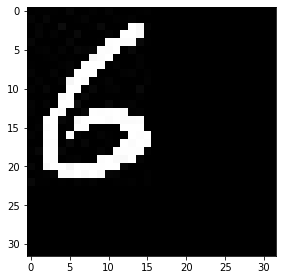

In [72]:
io.imshow(Y[0])

In [70]:
Y.shape

(2131, 32, 32)

In [74]:
from skimage.feature import hog
features = hog(Y[0], orientations=8,
pixels_per_cell=(4, 4),
cells_per_block=(1, 1))

In [76]:
hog_data = []
for im in data:
    features = hog(im, orientations=8,
pixels_per_cell=(4, 4),
cells_per_block=(1, 1))
    hog_data.append(features)

In [80]:
hog_data = np.asarray(hog_data)

In [95]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(input_shape=(hog_data.shape[1],1), filters=128, kernel_size=52, padding='same', activation='softmax'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=26, padding='same', activation='softmax'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_mod*3, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(hog_data.reshape(-1, hog_data.shape[1], 1), ans, epochs=8, batch_size = 15, callbacks=[checkpoint])

Epoch 1/8
334/334 [==============================] - 11s 29ms/step - loss: 2.2453 - accuracy: 0.2093
Epoch 2/8
334/334 [==============================] - 10s 29ms/step - loss: 2.0383 - accuracy: 0.2784
Epoch 3/8
334/334 [==============================] - 10s 29ms/step - loss: 0.4252 - accuracy: 0.8827
Epoch 4/8
334/334 [==============================] - 10s 29ms/step - loss: 0.2262 - accuracy: 0.9365
Epoch 5/8
334/334 [==============================] - 10s 29ms/step - loss: 0.1450 - accuracy: 0.9572
Epoch 6/8
334/334 [==============================] - 10s 29ms/step - loss: 0.1037 - accuracy: 0.9725
Epoch 7/8
334/334 [==============================] - 10s 29ms/step - loss: 0.0815 - accuracy: 0.98070s - loss: 0.0813 - accu
Epoch 8/8
334/334 [==============================] - 10s 29ms/step - loss: 0.0707 - accuracy: 0.98290s - loss: 0


In [1]:
hog_test = []
for im in Y_test:
    features = hog(im, orientations=8,
pixels_per_cell=(4, 4),
cells_per_block=(1, 1))
    hog_test.append(features)
    
hog_test = np.asarray(hog_test)
model.evaluate(hog_test.reshape(-1, hog_data.shape[1], 1), result_test)

NameError: name 'Y_test' is not defined